<a href="https://colab.research.google.com/github/vicentegilso/clasificaciondeimagenes/blob/main/Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification challenge

During next hours we will compete to build a classifier of natural scenes using a [dataset provided by NCTU](https://www.kaggle.com/c/cs-ioc5008-hw1/overview) (National Chiao Tung University, Taiwan).

[Leaderboard](https://www.kaggle.com/c/cs-ioc5008-hw1/leaderboard)

# Don't forget to configure the execution environment to run in GPU

## Download images from Google Drive

In [29]:
# Import Google Drive libraries
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [30]:
import warnings
warnings.filterwarnings("ignore")

In [31]:
# Authenticate with your Google Account
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [32]:
# Download the dataset of the challenge
download = drive.CreateFile({'id': '1DeEJ_LtbgIYPLYcPu3bD818iKXH_w8ru'})
download.GetContentFile('challenge.zip')

In [33]:
# Extract the files
import zipfile
from pathlib import Path
data = Path("./challenge.zip")

with zipfile.ZipFile(str(data_path), 'r') as zip_ref:
    zip_ref.extractall("./data")

In [34]:
ls

adc.json  challenge.zip  data/  sample_data/


In [35]:
ls data

test/  train/


In [36]:
ls data/train

bedroom/  highway/     livingroom/  opencountry/  tallbuilding/
coast/    insidecity/  mountain/    street/
forest/   kitchen/     office/      suburb/


In [37]:
ls data/train/bedroom

image_0000.jpg  image_0028.jpg  image_0056.jpg  image_0084.jpg  image_0112.jpg
image_0001.jpg  image_0029.jpg  image_0057.jpg  image_0085.jpg  image_0113.jpg
image_0002.jpg  image_0030.jpg  image_0058.jpg  image_0086.jpg  image_0114.jpg
image_0003.jpg  image_0031.jpg  image_0059.jpg  image_0087.jpg  image_0115.jpg
image_0004.jpg  image_0032.jpg  image_0060.jpg  image_0088.jpg  image_0116.jpg
image_0005.jpg  image_0033.jpg  image_0061.jpg  image_0089.jpg  image_0117.jpg
image_0006.jpg  image_0034.jpg  image_0062.jpg  image_0090.jpg  image_0118.jpg
image_0007.jpg  image_0035.jpg  image_0063.jpg  image_0091.jpg  image_0119.jpg
image_0008.jpg  image_0036.jpg  image_0064.jpg  image_0092.jpg  image_0120.jpg
image_0009.jpg  image_0037.jpg  image_0065.jpg  image_0093.jpg  image_0121.jpg
image_0010.jpg  image_0038.jpg  image_0066.jpg  image_0094.jpg  image_0122.jpg
image_0011.jpg  image_0039.jpg  image_0067.jpg  image_0095.jpg  image_0123.jpg
image_0012.jpg  image_0040.jpg  image_0068.jpg  imag

In [38]:
ls data/test

image_0000.jpg  image_0208.jpg  image_0416.jpg  image_0624.jpg  image_0832.jpg
image_0001.jpg  image_0209.jpg  image_0417.jpg  image_0625.jpg  image_0833.jpg
image_0002.jpg  image_0210.jpg  image_0418.jpg  image_0626.jpg  image_0834.jpg
image_0003.jpg  image_0211.jpg  image_0419.jpg  image_0627.jpg  image_0835.jpg
image_0004.jpg  image_0212.jpg  image_0420.jpg  image_0628.jpg  image_0836.jpg
image_0005.jpg  image_0213.jpg  image_0421.jpg  image_0629.jpg  image_0837.jpg
image_0006.jpg  image_0214.jpg  image_0422.jpg  image_0630.jpg  image_0838.jpg
image_0007.jpg  image_0215.jpg  image_0423.jpg  image_0631.jpg  image_0839.jpg
image_0008.jpg  image_0216.jpg  image_0424.jpg  image_0632.jpg  image_0840.jpg
image_0009.jpg  image_0217.jpg  image_0425.jpg  image_0633.jpg  image_0841.jpg
image_0010.jpg  image_0218.jpg  image_0426.jpg  image_0634.jpg  image_0842.jpg
image_0011.jpg  image_0219.jpg  image_0427.jpg  image_0635.jpg  image_0843.jpg
image_0012.jpg  image_0220.jpg  image_0428.jpg  imag

# Let's hack some code!

In [49]:
# Import fastai
from fastai.vision import *

In [50]:
import warnings
warnings.filterwarnings("ignore")

In [56]:
path = untar_data("data/train")

In [57]:
path

PosixPath('/content/data/train')

In [58]:
path.ls()

[PosixPath('/content/data/train/opencountry'),
 PosixPath('/content/data/train/tallbuilding'),
 PosixPath('/content/data/train/office'),
 PosixPath('/content/data/train/bedroom'),
 PosixPath('/content/data/train/suburb'),
 PosixPath('/content/data/train/forest'),
 PosixPath('/content/data/train/street'),
 PosixPath('/content/data/train/highway'),
 PosixPath('/content/data/train/livingroom'),
 PosixPath('/content/data/train/coast'),
 PosixPath('/content/data/train/kitchen'),
 PosixPath('/content/data/train/mountain'),
 PosixPath('/content/data/train/insidecity')]

In [60]:
(path / "opencountry").ls()

[PosixPath('/content/data/train/opencountry/image_0138.jpg'),
 PosixPath('/content/data/train/opencountry/image_0174.jpg'),
 PosixPath('/content/data/train/opencountry/image_0024.jpg'),
 PosixPath('/content/data/train/opencountry/image_0259.jpg'),
 PosixPath('/content/data/train/opencountry/image_0122.jpg'),
 PosixPath('/content/data/train/opencountry/image_0166.jpg'),
 PosixPath('/content/data/train/opencountry/image_0135.jpg'),
 PosixPath('/content/data/train/opencountry/image_0147.jpg'),
 PosixPath('/content/data/train/opencountry/image_0027.jpg'),
 PosixPath('/content/data/train/opencountry/image_0161.jpg'),
 PosixPath('/content/data/train/opencountry/image_0065.jpg'),
 PosixPath('/content/data/train/opencountry/image_0231.jpg'),
 PosixPath('/content/data/train/opencountry/image_0080.jpg'),
 PosixPath('/content/data/train/opencountry/image_0260.jpg'),
 PosixPath('/content/data/train/opencountry/image_0096.jpg'),
 PosixPath('/content/data/train/opencountry/image_0328.jpg'),
 PosixPa

In [116]:
# Load data
batch_size = 64
size = 128
data = ImageDataBunch.from_folder(path="./data", train="train", test="test", 
                                  valid_pct=0.2, 
                                  ds_tfms=get_transforms(), size=size, 
                                  bs=batch_size
                                  ).normalize(imagenet_stats)

In [117]:
# Show classes
data.classes

['bedroom',
 'coast',
 'forest',
 'highway',
 'insidecity',
 'kitchen',
 'livingroom',
 'mountain',
 'office',
 'opencountry',
 'street',
 'suburb',
 'tallbuilding']

In [118]:
print(len(data.classes))

13


In [119]:
# Initialize learner
learn = cnn_learner(data, models.resnet18, metrics=accuracy)

In [77]:
# Configure learner with new data and freeze conv layers
learn.data = data
learn.freeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


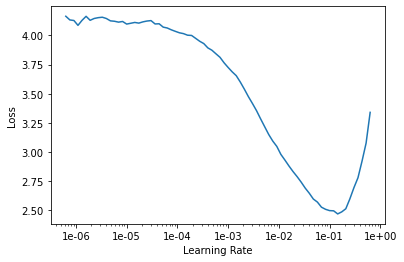

In [120]:
# Find learning rate
lr_find(learn)
learn.recorder.plot()

In [121]:
# Set learning rate
lr = 1e-2

In [122]:
# Train 10 epochs
learn.fit_one_cycle(10, slice(lr))

epoch,train_loss,valid_loss,accuracy,time
0,1.943411,0.856009,0.728242,00:08
1,1.240161,0.685327,0.797513,00:08
2,1.003245,0.704240,0.802842,00:08
3,0.836641,0.680775,0.804618,00:09
4,0.743615,0.553176,0.827709,00:08
5,0.640313,0.635660,0.818828,00:08
6,0.529493,0.472273,0.843695,00:08
7,0.424908,0.444070,0.854352,00:08
8,0.360159,0.439582,0.861456,00:08
9,0.312174,0.440027,0.854352,00:08


In [123]:
# Save the model
learn.save("score-8543")

In [124]:
# Unfreeze all the network
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


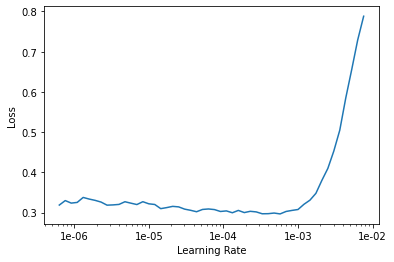

In [125]:
# Find learning rate
learn.lr_find()
learn.recorder.plot()

In [126]:
# Set learning rate
lr = 9e-3

In [127]:
# Train 10 epochs
learn.fit_one_cycle(10, max_lr=slice(lr/100,lr))

epoch,train_loss,valid_loss,accuracy,time
0,0.317986,0.447779,0.879218,00:08
1,0.384565,1.151756,0.815275,00:08
2,0.521900,1.046616,0.802842,00:08
3,0.502169,0.651001,0.859680,00:08
4,0.408563,0.558281,0.877442,00:08
5,0.314763,0.501991,0.884547,00:08
6,0.241644,0.462789,0.880995,00:08
7,0.187818,0.407671,0.898757,00:08
8,0.144387,0.434835,0.900533,00:09
9,0.103976,0.431730,0.900533,00:08


In [128]:
# Save model
learn.save("score-9005")

In [129]:
# Load data
batch_size = 64
size = 224
data = ImageDataBunch.from_folder(path="./data", train="train", test="test", 
                                  valid_pct=0.2, 
                                  ds_tfms=get_transforms(), size=size, 
                                  bs=batch_size
                                  ).normalize(imagenet_stats)

In [130]:
# Configure learner with new data and freeze conv layers
learn.data = data
learn.freeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


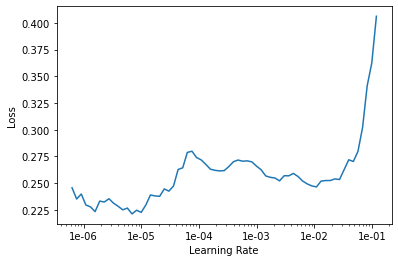

In [131]:
# Find learning rate
learn.lr_find()
learn.recorder.plot()

In [134]:
# Set learning rate
lr = 4e-5

In [136]:
# Train 10 epochs
learn.fit_one_cycle(20, max_lr=slice(lr))

epoch,train_loss,valid_loss,accuracy,time
0,0.260827,0.165505,0.946714,00:17
1,0.237493,0.162860,0.946714,00:17
2,0.227028,0.169430,0.950266,00:17
3,0.230348,0.158833,0.950266,00:17
4,0.236360,0.160830,0.948490,00:17
5,0.236699,0.163483,0.950266,00:17
6,0.223097,0.155431,0.948490,00:17
7,0.225872,0.154449,0.953819,00:17
8,0.210433,0.154249,0.950266,00:17
9,0.219500,0.155234,0.948490,00:17


In [137]:
# Save model
learn.save("score-9555")

In [138]:
# Unfreeze conv layers
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


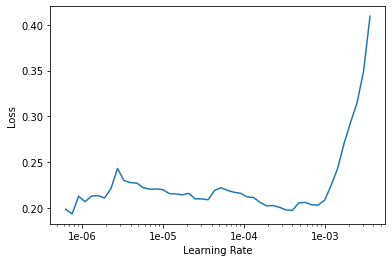

In [139]:
# Find learning rate
learn.lr_find()
learn.recorder.plot()

In [148]:
# Set learning rate
lr = 1e-4

In [150]:
learn.fit_one_cycle(4, max_lr=slice(lr/100,lr))

epoch,train_loss,valid_loss,accuracy,time
0,0.062224,0.231968,0.930728,00:19
1,0.055551,0.236501,0.930728,00:18
2,0.060617,0.234795,0.934281,00:18
3,0.057357,0.234429,0.932504,00:18


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fa0b3cd7b90>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1324, in __del__
    self._shutdown_workers()
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fa0b3cd7b90>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1316, in _shutdown_workers
    if w.is_alive():
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1324, in __del__
    self._shutdown_workers()
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1316, in _shutdown_workers
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
    if w.is_alive():
  File "/usr/lib/pytho

In [151]:
# Save model
learn.save("score-9325")

# Explore the data

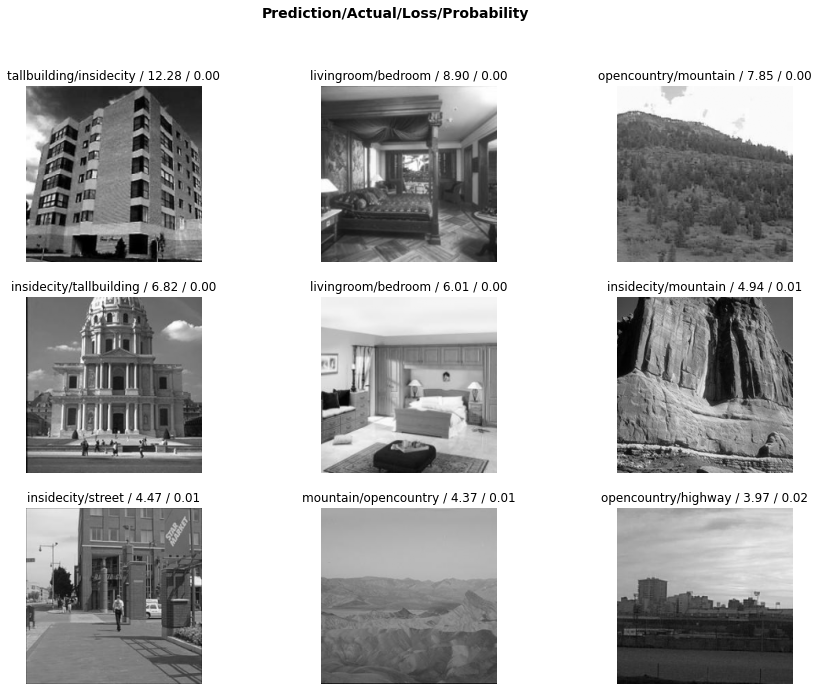

In [152]:
# Mostrar muestras peor classificadas
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(9, figsize=(15,11))

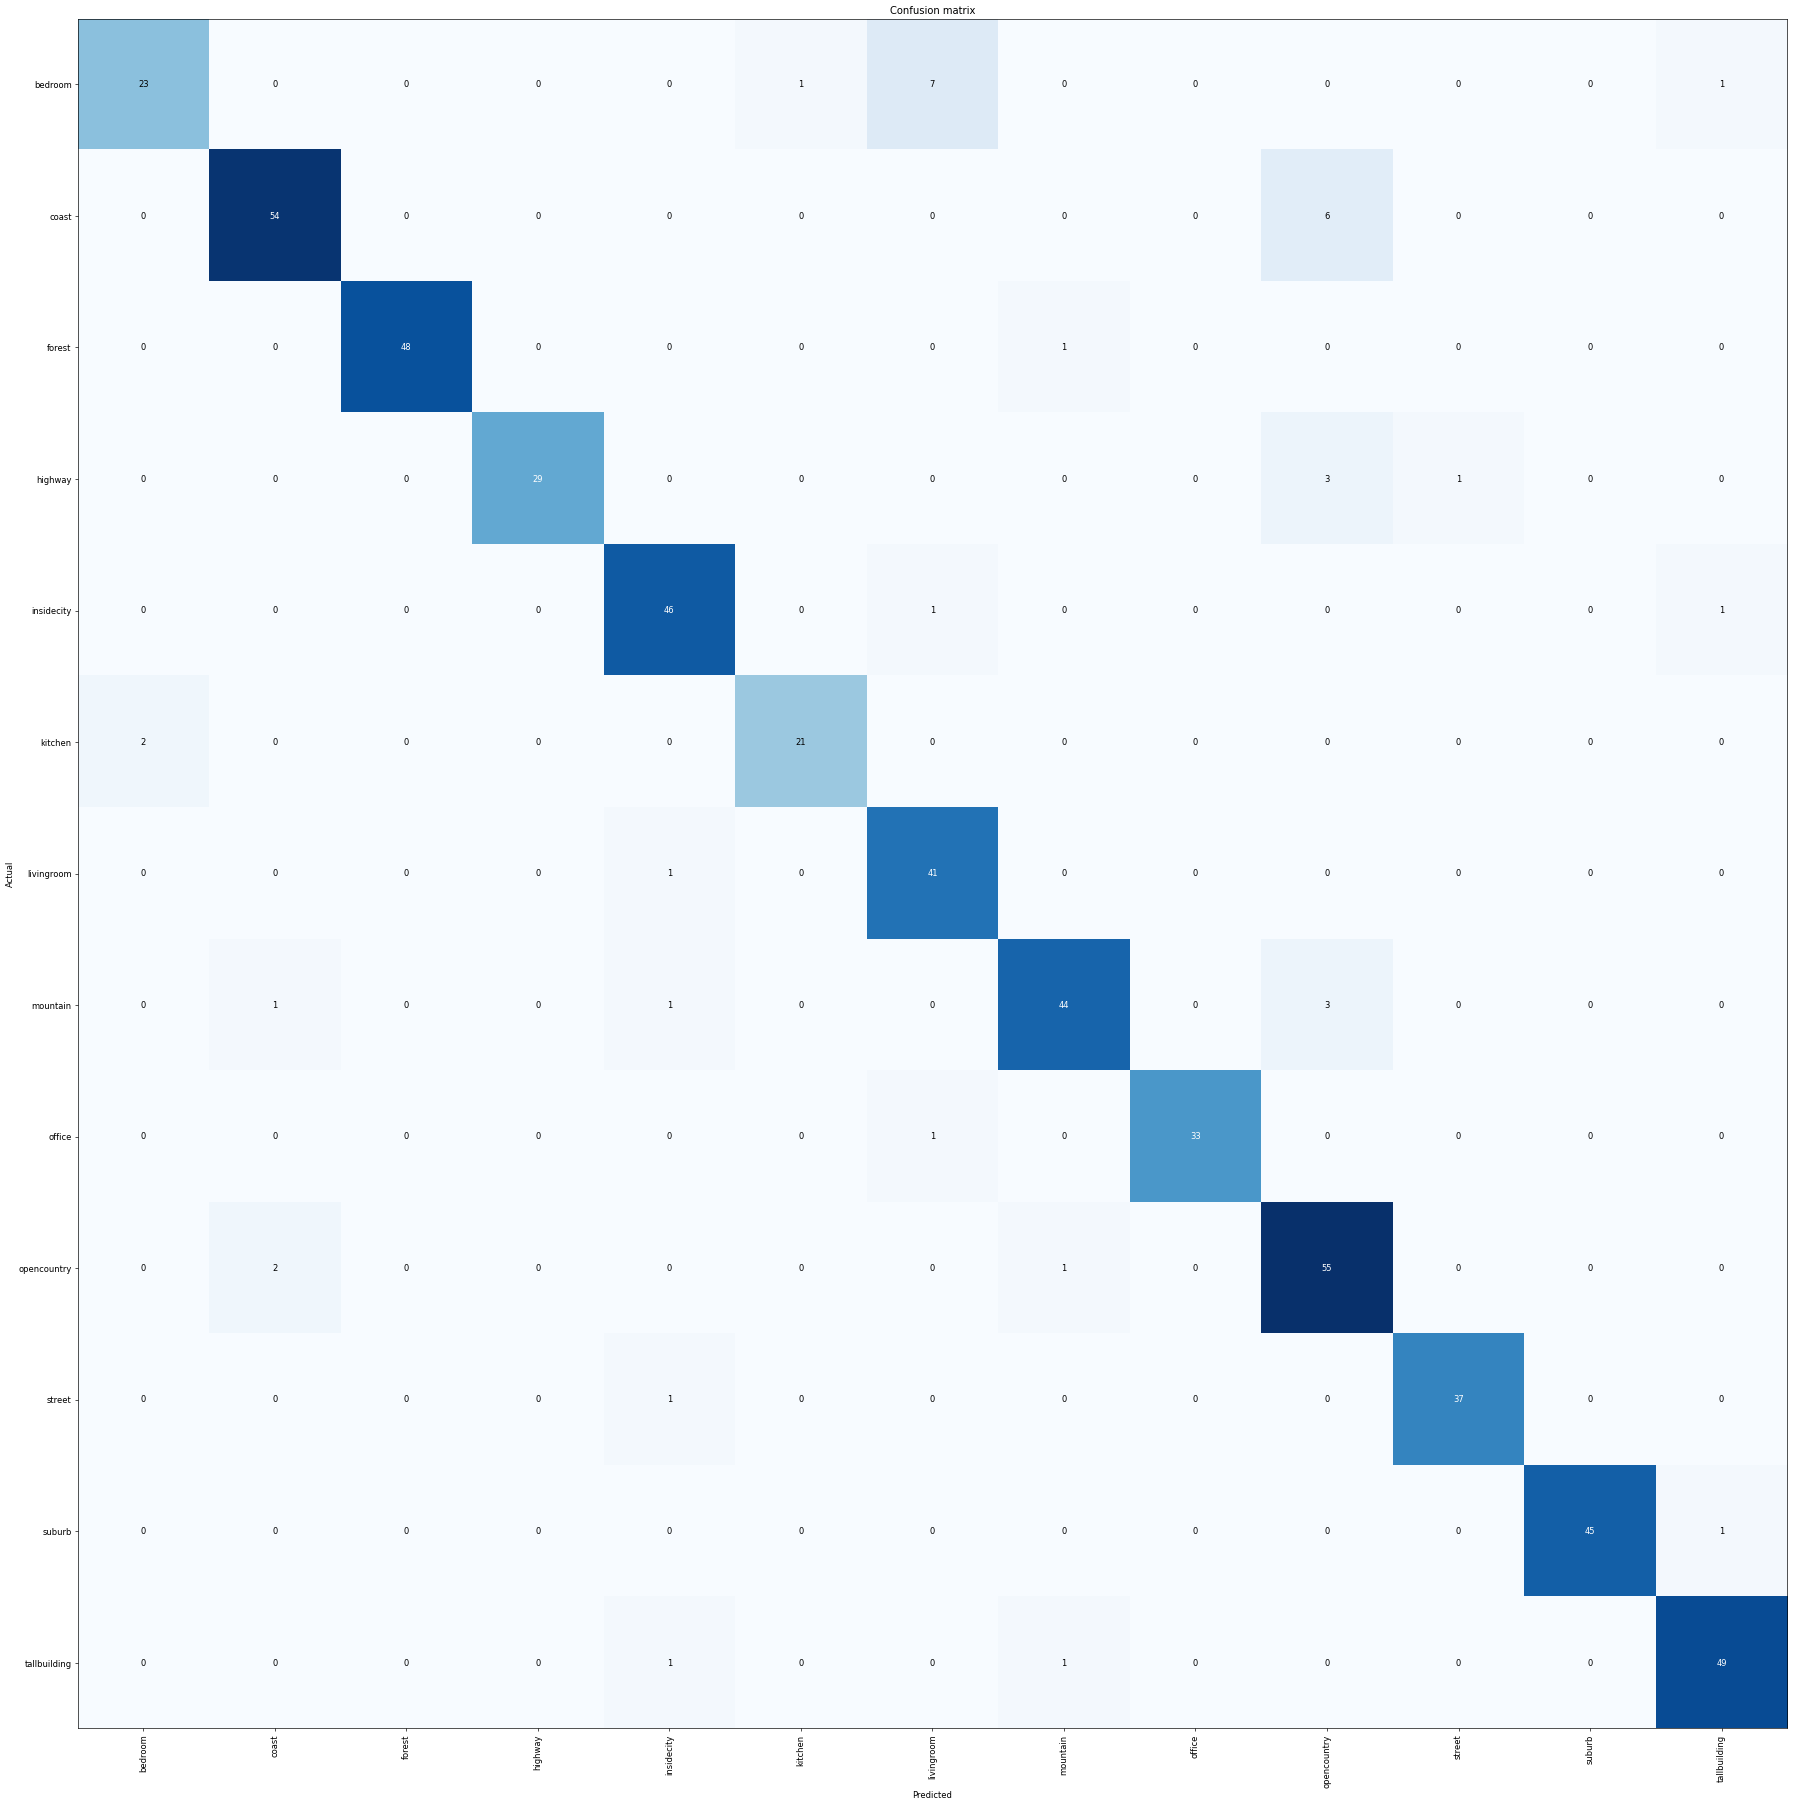

In [153]:
# Show confusion matrix
interp.plot_confusion_matrix(figsize=(30,30), dpi=60)

In [154]:
# Show most confused classes
interp.most_confused(min_val=2)

[('bedroom', 'livingroom', 7),
 ('coast', 'opencountry', 6),
 ('highway', 'opencountry', 3),
 ('mountain', 'opencountry', 3),
 ('kitchen', 'bedroom', 2),
 ('opencountry', 'coast', 2)]

# Experiment